In [59]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import pandas as pd

# Example: calculating the frequency of words of a song

Sonf: Perfect
    
Autfor: Ed Sheeran
    
Text extracted from: https://www.letras.com/ed-sheeran/perfect/


In [60]:
original_text="""I found a love for me.
Darling, just dive right in and follow my lead.
I found a girl, beautiful and sweet.
I never knew you were the someone waiting for me.

'Cause we were just kids when we fell in love.
Not knowing what it was.
I will not give you up this time.
Darling, just kiss me slow.
Your heart is all I own.
And in your eyes, you're holding mine.
"""

In [61]:
#Divide text into words and omit comma in word count
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenized_word = tokenizer.tokenize(original_text)
print(tokenized_word)

['I', 'found', 'a', 'love', 'for', 'me', 'Darling', 'just', 'dive', 'right', 'in', 'and', 'follow', 'my', 'lead', 'I', 'found', 'a', 'girl', 'beautiful', 'and', 'sweet', 'I', 'never', 'knew', 'you', 'were', 'the', 'someone', 'waiting', 'for', 'me', 'Cause', 'we', 'were', 'just', 'kids', 'when', 'we', 'fell', 'in', 'love', 'Not', 'knowing', 'what', 'it', 'was', 'I', 'will', 'not', 'give', 'you', 'up', 'this', 'time', 'Darling', 'just', 'kiss', 'me', 'slow', 'Your', 'heart', 'is', 'all', 'I', 'own', 'And', 'in', 'your', 'eyes', 'you', 're', 'holding', 'mine']


In [62]:
#Print the frequency distribution of the text
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 54 samples and 74 outcomes>


Different methods that allow you to quickly determine frequently used words in the text.

I.See the two most common words

In [63]:
fdist.most_common(2)

[('I', 5), ('me', 3)]

In the text "I" is the first most frequently repeated word, specifically it is repeated 5 times. Then "me" is the second most repeated word, which is repeated 3 times.


II. See the 10 most repeated words and their respective frequencies in a table:

In [64]:
fdist.tabulate(10)

      I      me    just      in     you   found       a    love     for Darling 
      5       3       3       3       3       2       2       2       2       2 


Previously, the 10 words with the highest frequency are observed.


III. Frequency distribution graph

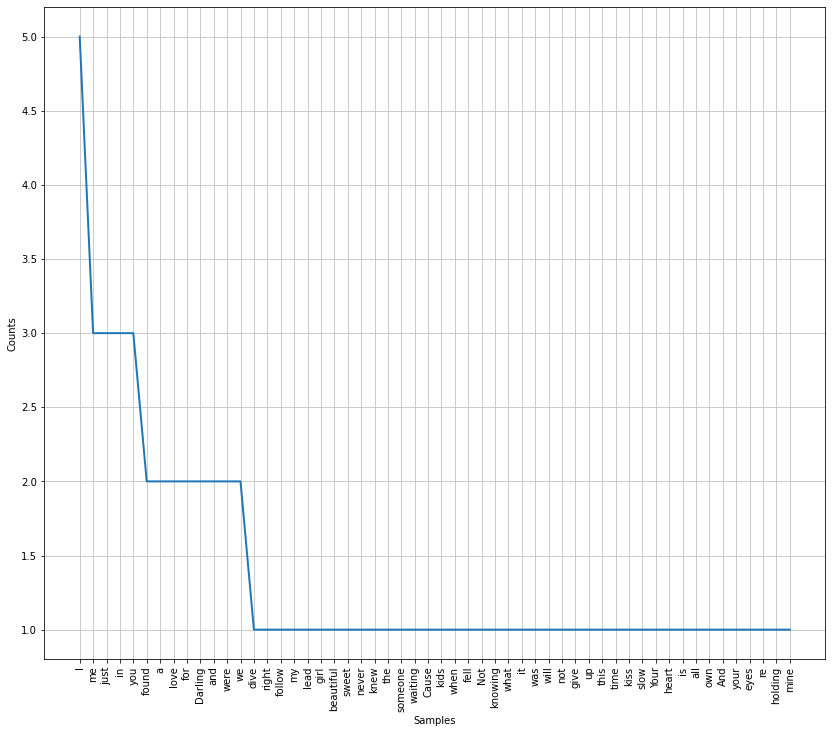

In [65]:
plt.figure(figsize=(14,12))
fdist.plot(54,cumulative=False)
plt.show()

# The stopwords are then removed and stemming is performed.

In [66]:
stop_words=set(stopwords.words("english"))
print("Words to be omitted: ", stop_words)

Words to be omitted:  {'who', "that'll", 'doing', 'very', 'against', "isn't", "you'll", "you're", 'this', 'in', 'have', 'being', "wasn't", "mightn't", "hasn't", 'then', 'what', 'before', 'why', 'hers', 'not', 'can', 'our', 'is', 'mustn', 'its', 'me', 'those', 'there', 'other', 'should', 'but', 'on', 'had', 'above', 'here', 'under', 'and', 'few', 'will', 'was', 'been', 'has', 'through', 'needn', 'if', 'such', 'wasn', 'them', 'as', 'does', 'couldn', 't', "couldn't", 'his', 'hasn', 'yourself', 'now', 'shouldn', "should've", 'm', 'theirs', 'ma', 'don', 'some', 'an', 'you', 'at', 'having', 'most', "it's", 'over', 'during', 'same', 'they', "won't", 'only', 'into', 'we', "mustn't", 'with', 'whom', 'shan', 'didn', 'aren', 'am', 'yourselves', 'herself', 'be', 'won', 'himself', 'while', 'ours', 'both', 've', 'd', 'any', 'll', "doesn't", 'wouldn', 'my', 'each', 'it', 'off', 'nor', 'o', 'him', 'when', "weren't", 'these', 'until', 'because', 'or', 'to', "you've", 'mightn', 'more', "shouldn't", 'no'

In [67]:
tokens_without_sw = [word for word in tokenized_word if not word in stop_words]
print(tokens_without_sw)

['I', 'found', 'love', 'Darling', 'dive', 'right', 'follow', 'lead', 'I', 'found', 'girl', 'beautiful', 'sweet', 'I', 'never', 'knew', 'someone', 'waiting', 'Cause', 'kids', 'fell', 'love', 'Not', 'knowing', 'I', 'give', 'time', 'Darling', 'kiss', 'slow', 'Your', 'heart', 'I', 'And', 'eyes', 'holding', 'mine']


In [68]:
fdist2 = FreqDist(tokens_without_sw)
print(fdist2)

<FreqDist with 30 samples and 37 outcomes>


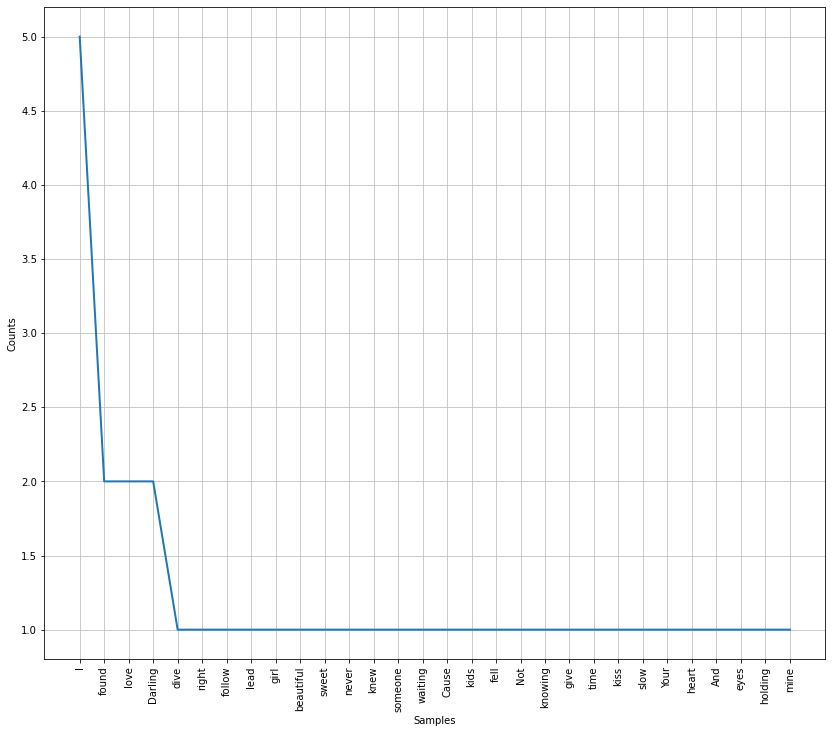

In [69]:
# Frequency Distribution Plot
plt.figure(figsize=(14,12))
fdist2.plot(30,cumulative=False)
plt.show()

# Sentiment analysis

In [70]:
tokenizer_sentence = nltk.data.load('tokenizers/punkt/english.pickle')
#Crear analizador del texto:
analizador = SentimentIntensityAnalyzer()
sentences = tokenizer_sentence.tokenize(original_text)

#Realizar el análisis para cada oración de la canción
for sentence in sentences:
    print(sentence)
    scores = analizador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()

I found a love for me.
neg :  0.0

neu :  0.417

pos :  0.583

compound :  0.6369

Darling, just dive right in and follow my lead.
neg :  0.0

neu :  0.678

pos :  0.322

compound :  0.5859

I found a girl, beautiful and sweet.
neg :  0.0

neu :  0.303

pos :  0.697

compound :  0.7845

I never knew you were the someone waiting for me.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

'Cause we were just kids when we fell in love.
neg :  0.0

neu :  0.682

pos :  0.318

compound :  0.6369

Not knowing what it was.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

I will not give you up this time.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

Darling, just kiss me slow.
neg :  0.0

neu :  0.312

pos :  0.688

compound :  0.765

Your heart is all I own.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

And in your eyes, you're holding mine.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0



In the above result we see a score for each sentence of the text. As an example, let's analyze the first sentence of the evaluated text. As an example, let's analyze the first sentence: "I found a love for me".

The above sentence has a value of:
- "neg : 0.0" : this indicates how negative the sentence is. In this case zero

- "neu : 0.417": this indicates how neutral the sentence is, in this case it would be intermediate

- "pos : 0.583" : indicates how positive the sentence is.

- "compound : 0.6369": indicates whether the sentence is negative or positive. This value ranges from -1 to 1. In this case, it is closer to 1, which means that the sentence lacks positivity. This value is similar to the statistics we mentioned previously.

We see that the mentioned sentence has the highest positivity score, followed by neutrality.

The selected text is categorized as a "romantic" song, which is reflected in the scores obtained in this analysis. In sum, it is observed that all sentences score zero in negativity, tending to be neutral, and positive.